# 🧠 Dandiset 000945 Data Exploration

**This notebook was *AI-generated* using *dandi-notebook-gen* and has *not* been fully verified by a human. Use caution when interpreting its analyses.**

---

## Overview

**Dandiset ID:** DANDI:000945  
**Title:** Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

**Citation:**  
Ramachandran, Sandhya; Gao, Huan; Yu, Kai; He, Bin (2025). Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/000945/draft

**Description:**  
Electrophysiological recordings acquired using 32-channel NeuroNexus electrodes implanted into awake rats, during trials of transcranial focused ultrasound stimulation (tFUS). Multiple pulse repetition frequencies (PRFs) were tested across repeated sessions. Data include spike times labeled with cell types and times for each trial onset.

---

## Getting started

This notebook uses:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`

Please ensure these are installed before continuing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient

sns.set_theme()
plt.rcParams['figure.figsize'] = (10, 6)

## List all assets in the Dandiset

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets.")
# Display first 5 asset paths
for i, asset in enumerate(assets[:5]):
    print(f"{i+1}: {asset.path}")

Found 75 assets.
1: sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
2: sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
3: sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
4: sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
5: sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


## Load selected NWB file

We'll load one NWB file as an example. You can modify the URL or asset to explore others.

In [3]:
url = "https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/"

fileobj = remfile.File(url)
f = h5py.File(fileobj)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwbfile = io.read()

print(f"Session description: {nwbfile.session_description}")
print(f"Subject ID: {nwbfile.subject.subject_id}")
print(f"Subject species: {nwbfile.subject.species}, Sex: {nwbfile.subject.sex}, Age: {nwbfile.subject.age}")
print(f"Institution: {nwbfile.institution}")

Session description: Awake S1 Stimulation by tFUS
Subject ID: BH497
Subject species: Rattus norvegicus, Sex: M, Age: P24W
Institution: Carnegie Mellon University


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Trials metadata

In [4]:
trials = nwbfile.trials
print(f"Number of trials: {len(trials)}")

# Show start & stop times for first 10 trials
import pandas as pd
trial_df = pd.DataFrame({
    'start_time': trials['start_time'][:10],
    'stop_time': trials['stop_time'][:10]
})
trial_df.head()

Number of trials: 500


,start_time,stop_time
0,0.408248,2.608248
1,3.050619,5.250619
2,5.559296,7.759296
3,8.108483,10.308483
4,10.392863,12.592863


## Units (neurons) metadata

In [5]:
units = nwbfile.units
print(f"Number of units: {len(units)}")
print("Unit columns:", units.colnames)

unit_ids = units.id[:]
celltypes = units['celltype_label'][:]

# Show first 10 unit IDs and cell types
unit_table = pd.DataFrame({'unit_id': unit_ids[:10], 'celltype': celltypes[:10]})
unit_table.head()

Number of units: 64
Unit columns: ('spike_times', 'celltype_label')


,unit_id,celltype
0,0,2.0
1,1,1.0
2,2,2.0
3,3,1.0
4,4,2.0


## Raster plot of spike times for a subset of units

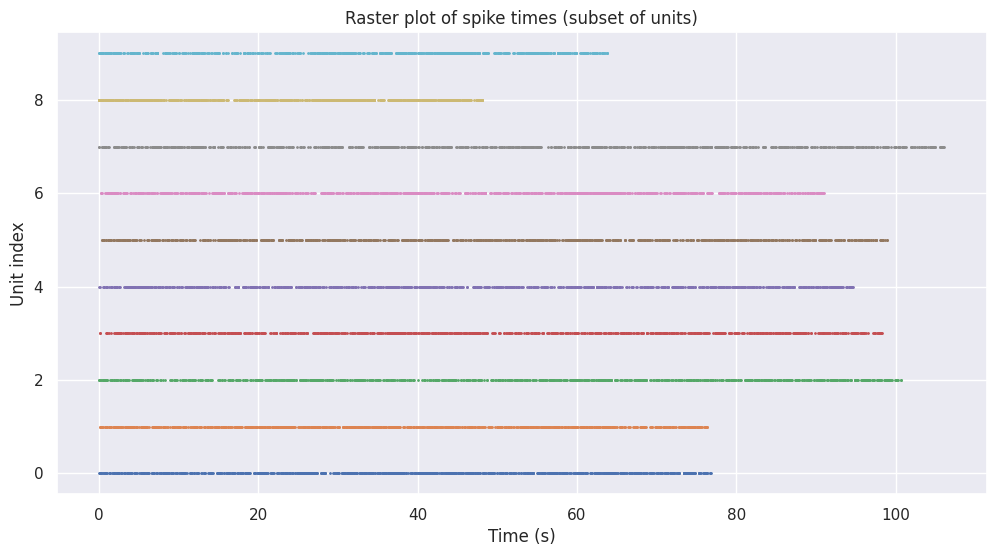

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
num_units_to_show = min(10, len(unit_ids))
for i in range(num_units_to_show):
    unit_id = unit_ids[i]
    spike_times = units['spike_times'][i]  # This is an array of spike times for this unit
    # For large spike trains, plot only first 1000 spikes to avoid overplotting
    spike_times = spike_times[:1000] if len(spike_times) > 1000 else spike_times
    ax.scatter(spike_times, np.full_like(spike_times, i), s=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Unit index')
ax.set_title('Raster plot of spike times (subset of units)')
plt.show()

## Electrode information

In [7]:
elecs = nwbfile.electrodes
print(f"Number of electrodes: {len(elecs)}")
print("Electrode columns:", elecs.colnames)

elec_df = pd.DataFrame({col: elecs[col][:] for col in elecs.colnames})
elec_df.head()

Number of electrodes: 32
Electrode columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')


,x,y,z,imp,location,filtering,group,group_name
0,1.0,10.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13507...,shank1elec1
1,1.0,11.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13507...,shank1elec2
2,1.0,9.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13507...,shank1elec3
3,1.0,8.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13507...,shank1elec4
4,1.0,7.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13507...,shank1elec5


## Plot electrode positions colored by impedance

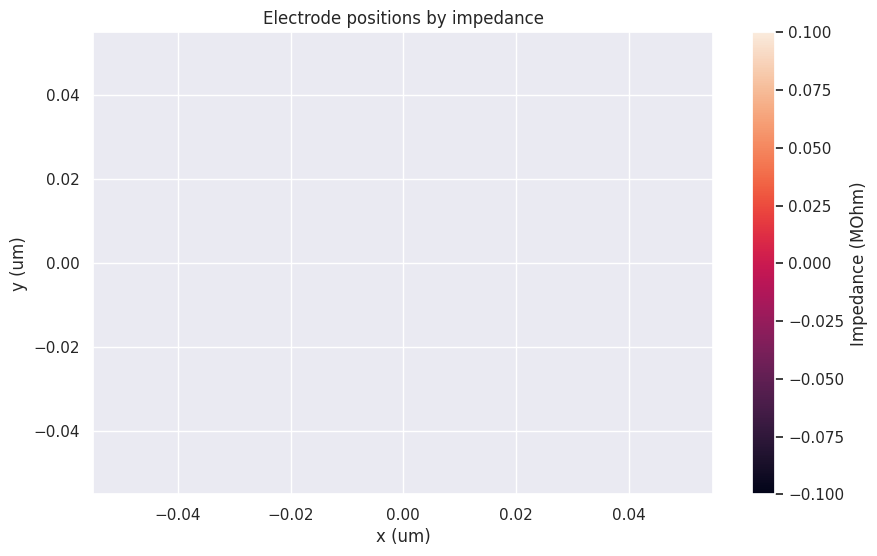

In [8]:
fig, ax = plt.subplots()
scatter = ax.scatter(elec_df['x'], elec_df['y'], c=elec_df['imp'])
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Electrode positions by impedance')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Impedance (MOhm)')
plt.show()

## Summary

This notebook loaded a DANDI NWB file remotely, summarized metadata, listed trials, displayed unit info, and visualized spike times and electrode geometry.

You can extend it by:
- Looping over more sessions/files
- Accessing LFP data if present
- Performing spike count analyses by trial
- Exploratory analyses of response by PRF condition
- Other visualizations relevant to your research questions

---

Generated by *dandi-notebook-gen*.